In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Walmart.csv")
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [3]:
print("Dimensions",df.shape)

Dimensions (6435, 8)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [7]:
print(df['Holiday_Flag'].value_counts())

0    5985
1     450
Name: Holiday_Flag, dtype: int64


In [8]:
print(df.corr())

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000  


C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


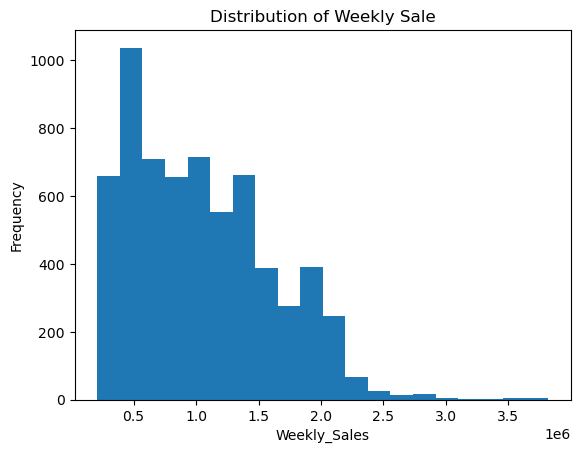

In [13]:
plt.hist(df['Weekly_Sales'],bins=20)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sale')
plt.show()


Text(0.5, 1.0, 'Weekly sales by Holiday Flag')

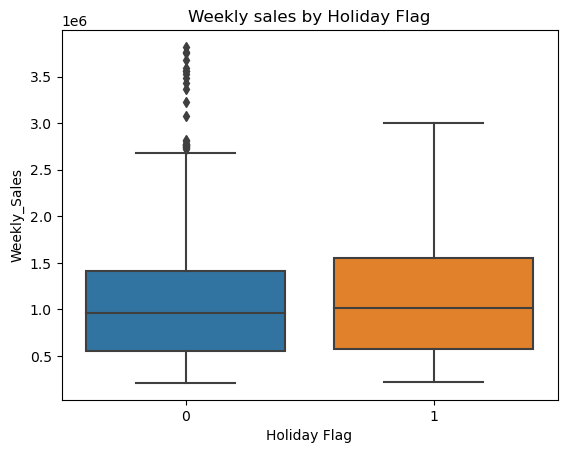

In [17]:
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly_Sales')
plt.title('Weekly sales by Holiday Flag')

In [18]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\3023999556.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


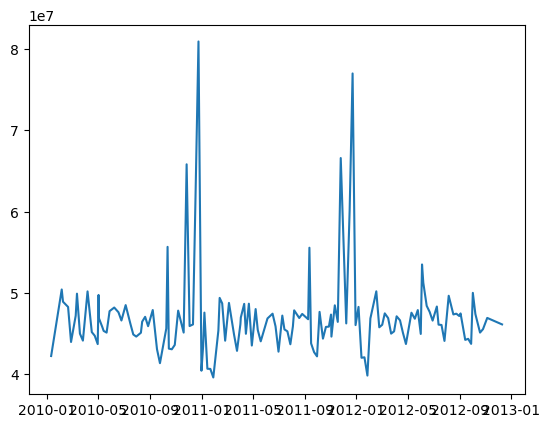

In [21]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales)

In [22]:
weekly_sales

Date
2010-01-10    42239875.87
2010-02-04    50423831.26
2010-02-07    48917484.50
2010-02-19    48276993.78
2010-02-26    43968571.13
                 ...     
2012-10-08    47403451.04
2012-10-19    45122410.57
2012-10-26    45544116.29
2012-11-05    46925878.99
2012-12-10    46128514.25
Name: Weekly_Sales, Length: 143, dtype: float64

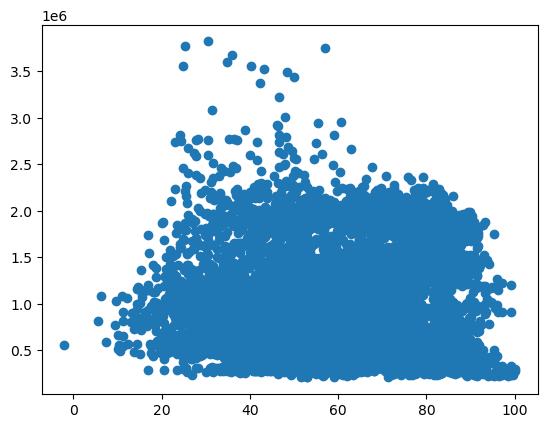

In [28]:
plt.scatter(df['Temperature'],df['Weekly_Sales'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6164\1368533763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<Axes: >

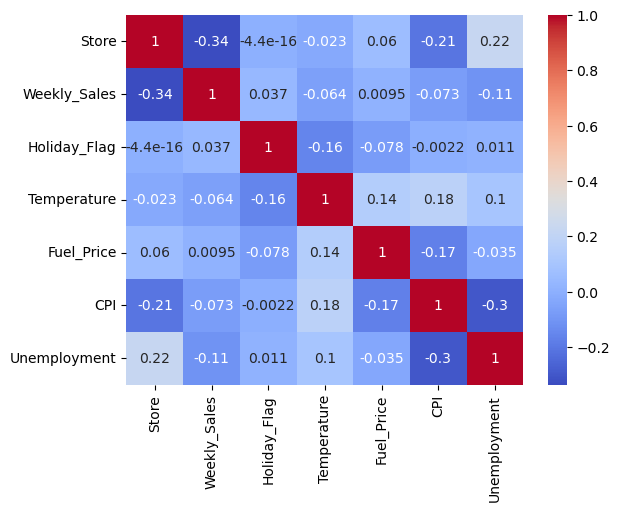

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR()
]


results = []
for model in models:

    model.fit(X_train, y_train)

  
    y_pred = model.predict(X_test)

  
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)


    results.append({'Model': type(model).__name__, 'MSE': mse, 'RMSE': rmse, 'R2': r2})


results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['RMSE'].idxmin(), 'Model']


print(results_df)


print("Best Model:", best_model)


                   Model           MSE           RMSE        R2
0       LinearRegression  2.744552e+11  523884.740454  0.148064
1  RandomForestRegressor  2.205749e+10  148517.626966  0.931531
2                    SVR  3.313286e+11  575611.502991 -0.028477
Best Model: RandomForestRegressor


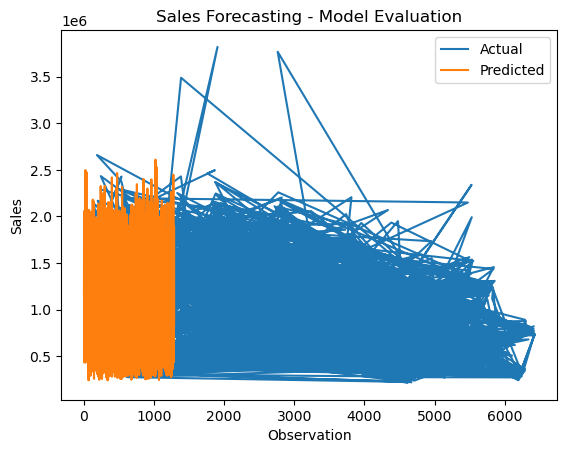

Train Set - MSE: 3006862680.6670976
Train Set - RMSE: 54834.86738077423
Train Set - R-squared: 0.9905300799472888
Test Set - MSE: 21236748086.980865
Test Set - RMSE: 145728.33659580714
Test Set - R-squared: 0.9340790092137122
Sales Forecast for the Next 12 Months:
[731472.2012 732217.324  728666.6347 740076.844  763411.9881 711023.7338
 714314.2165 714842.768  722227.9335 726097.4929 722121.1504 743129.3909]


In [37]:


X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)


forecast_input = df.drop(['Weekly_Sales', 'Date'], axis=1).tail(12)
forecast = model.predict(forecast_input)


plt.plot(y_test, label='Actual')
plt.plot(y_pred_test, label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.title('Sales Forecasting - Model Evaluation')
plt.legend()
plt.show()

print('Train Set - MSE:', mse_train)
print('Train Set - RMSE:', rmse_train)
print('Train Set - R-squared:', r2_train)
print('Test Set - MSE:', mse_test)
print('Test Set - RMSE:', rmse_test)
print('Test Set - R-squared:', r2_test)


print('Sales Forecast for the Next 12 Months:')
print(forecast)
